# Apple vs Google: A Comparative Sentiment Analysis in Tweets Related to Apple and Google Products

# Business understanding

In today’s digital age, social media platforms like Twitter provide a massive amount of real-time insights into consumer opinions, especially regarding products, brand  and services. For tech giants like Apple and Google, monitoring sentiment around their products can be a crucial business strategy. Understanding how consumers feel about their offerings—whether positively, negatively, or neutrally—helps inform marketing strategies, product development, and customer support.

## Project overview

## Business problem

Apple and Google are two of the most influential tech companies globally, with millions of users and customers who actively discuss their products on platforms like Twitter. However, manually analyzing sentiment in these discussions would be both time-consuming and impractical given the sheer volume of tweets. Therefore, automating sentiment analysis using an NLP model will allow both companies to process and understand consumer opinions quickly and at scale. This could give them a competitive edge by allowing for a timely response to customer feedback, identifying emerging issues, and improving customer satisfaction and brand loyalty

## Project objectives
### Main Objective

- The primary objective is to develop an NLP-based machine learning model that can accurately classify the sentiment of tweets related to Apple and Google products as positive, negative, or neutral.
### Specific Objectives




- Preprocess tweet data effectively (removing noise, handling stopwords, tokenization) to improve model accuracy.

- Build and evaluate multiple machine learning and deep learning models (Logistic Regression, Random Forest, Neural Network, LSTM) to classify tweet sentiments.

- Identify the best performing models and give recommendations.

## Justification

Understanding sentiment at scale is critical for organizations in highly competitive industries like tech. By automating the analysis of millions of tweets related to Apple and Google products, companies can quickly gauge customer satisfaction, identify emerging trends, and proactively address negative sentiments. Sentiment analysis also allows these companies to measure the impact of new product releases, marketing campaigns, and public relations efforts.

## Research questions

- What preprocessing techniques significantly improve model accuracy on tweet text?

- Which machine learning or deep learning model performs best in classifying tweet sentiments?

- How do different sentiment classes (positive, negative, neutral/no emotion) perform across models?



# Data understanding

## Data Collection
The dataset for this project comes from [CrowdFlower](https://data.world/crowdflower/brands-and-product-emotions) and contains over 9,000 tweets labeled with sentiment (positive, negative, or neutral). These labeled examples provide a training set to build and evaluate the sentiment classification model. The data is enriched with various features such as tweet text, tweet ID, user ID, and the sentiment label, which is crucial for training the model.

To further improve the model, external data such as newer tweets about Apple and Google products or additional labeled sentiment datasets might be useful for retraining or fine-tuning.

### Load libraries

In [ ]:
!pip install emoji
import pandas as pd
import re
import json
import emoji
import string
import nltk
import matplotlib.pyplot as plt
import tensorflow as tf

from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk import FreqDist
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


### Load the data

In [ ]:
df = pd.read_csv("tweet_product_company.csv", encoding="latin-1")
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [ ]:
df.tail()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product
9092,Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...,NaN,No emotion toward brand or product


In [ ]:
df.sample(5)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
7655,#sxsw=appreciation for Twitter. My account has...,NaN,No emotion toward brand or product
5217,RT @mention #Apple to Open Pop-Up Shop at #SXS...,NaN,No emotion toward brand or product
7432,{link} Report: Apple to Open Pop-Up Store at #...,NaN,No emotion toward brand or product
8246,Excitement in the social network space with Go...,Other Google product or service,Positive emotion
2626,Slides are available on the @mention site for ...,NaN,No emotion toward brand or product


#  Data cleaning

## Correct formats

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


- **tweet_text**: The data type `object` is appropriate as it contains text data.
- **emotion_in_tweet_is_directed_at**: The `object` type is suitable since it likely contains categorical or string values indicating emotion direction.
- **is_there_an_emotion_directed_at_a_brand_or_product**: The `object` type is correct as it likely holds categorical values (e.g., "Yes" or "No").


All columns have the correct data type (`object`) for their respective content.

## Missing Values

In [ ]:
df.isna().sum()

,0
tweet_text,1
emotion_in_tweet_is_directed_at,5802
is_there_an_emotion_directed_at_a_brand_or_product,0


- The dataset has a total of 9093 rows.
- The **tweet_text** is the primary feature and is almost complete.
- The other two features have missing values and might require further preprocessing before use in sentiment analysis or classification tasks.



Removed blank row with the missing value in **tweet_text** since there is no tweet to draw sentiment from.

In [ ]:
df.dropna(subset=["tweet_text"],inplace=True)
df.isna().sum()

,0
tweet_text,0
emotion_in_tweet_is_directed_at,5801
is_there_an_emotion_directed_at_a_brand_or_product,0


Replaced missing values on column **emotion_in_tweet_is_directed_at** with `'Unknown'`: Since we have over 60% of missing values in the ' emotion is directed at' column, we will assume the sentiments weren't directed toward any specific brand and fill the missing data with 'Unknown'.

In [ ]:
product_names = df.emotion_in_tweet_is_directed_at.unique()
df.emotion_in_tweet_is_directed_at.fillna("Unknown",inplace=True)
df.isna().sum()

,0
tweet_text,0
emotion_in_tweet_is_directed_at,0
is_there_an_emotion_directed_at_a_brand_or_product,0


Keeping the original text

In [ ]:
df["original_tweet"]= df.tweet_text

## Feature Engineering

### Removing unwanted Text

In [ ]:
# cleaning unwanted characters
def remove_unwanted_text(text):
    if isinstance(text, str):
        return re.sub(r'[^\x00-\x7F]+', '', text)
    return text


df['tweet_text'] = df['tweet_text'].apply(remove_unwanted_text)

df.tweet_text

,tweet_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...
1,@jessedee Know about @fludapp ? Awesome iPad/i...
2,@swonderlin Can not wait for #iPad 2 also. The...
3,@sxsw I hope this year's festival isn't as cra...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...
...,...
9088,Ipad everywhere. #SXSW {link}
9089,"Wave, buzz... RT @mention We interrupt your re..."
9090,"Google's Zeiger, a physician never reported po..."
9091,Some Verizon iPhone customers complained their...


### Lowercasing
Convert all `tweet_text` to lowercase to maintain consistency

In [ ]:
df.tweet_text = df.tweet_text.str.lower()

We did Lowercasing to make texts uniform

**Converting Transcript to strings**

In [ ]:
def transcription_to_strings(df):
    # matches basic sad face :(, :-(
    sad_face = re.compile(r'[:;8]?[\'\-]?\([/\\]')

    # matches crying face :'(, :'-(
    crying_face = re.compile(r'[:;8]?[\'\-]?\'\(')

    # matches complex sad faces with slashes, tears, etc.
    complex_sad_face = re.compile(r'[:;8]?[\'\-]?\([/\\]\)?')

    # edge case: faces with tears or creative symbols like T_T, TT_TT
    crying_edge_case = re.compile(r'(T_T|tt_t|TT_TT)')

    # apply pattern replacement across the DataFrame's text column
    df['tweet_text'] = df['tweet_text'].apply(lambda x:
        crying_edge_case.sub('crying face',
        complex_sad_face.sub('complex sad face',
        crying_face.sub('crying face',
        sad_face.sub('sad face', x)))))

transcription_to_strings(df)


- Translated emoticons into phrases like 'sad face', 'crying face' to preserve emotional context for sentimental analysis

**Dealing with emojis**

In [ ]:
for index in range(df.tweet_text.shape[0]):
    df.tweet_text.iloc[index] = emoji.demojize(df.tweet_text.iloc[index])

- Changed emojis into text formart since emojis carry alot of meaning and helps models learn them.

**Replacing abbreviation with its full form**

In [ ]:
# loading abbreviation dictionary from abbr.txt
with open('abbr.txt', 'r') as file:
    abbr_dict = json.load(file)

# expand abbreviations in a tweet
def expand_abbr_in_tweet(text):
    return " ".join([abbr_dict.get(word, word) for word in text.split()])

# apply the function to each tweet in the DataFrame
df['tweet_text'] = df['tweet_text'].apply(expand_abbr_in_tweet)

- Replaced abreviation with its full form so as they won't be removed as stopwords

### Removing Links
First check if there is any links

In [ ]:
def text_processor(process, pattern):
    def extract_pattern(text):
        if isinstance(text, str):
            return re.findall(pattern, text)
        return []

    # apply pattern extraction
    links_list = df['tweet_text'].apply(extract_pattern)

    # flatten the list of lists
    all_links = [link for sublist in links_list for link in sublist]

    # check if anything was found
    if all_links:
        print(f"{process} found in the dataset: {len(all_links)} matches")
        print(all_links[:5])  # optional: show a few samples
    else:
        print(f"No {process} found.")

In [ ]:
def remove_pattern(pattern):
    df['tweet_text'] = df['tweet_text'].apply(lambda x: re.sub(pattern, '', x))

In [ ]:
to_remove_or_check = "Links"
pattern = r'http\S+|www\S+'
text_processor(to_remove_or_check,pattern)

Links found in the dataset: 48 matches
['http://ht.ly/49n4m', 'http://bit.ly/ieavob', 'http://bit.ly/gvlrin', 'http://j.mp/grn7pk)', 'http://bit.ly/axzwxb']


Removing links found

In [ ]:
remove_pattern(pattern)

Checking if any links are remaining

In [ ]:
text_processor(to_remove_or_check,pattern)

No Links found.


**Removing Usernames**

Checking for twitter usernames

In [ ]:
to_remove_or_check = "Usernames"
pattern = r'@\S+'
text_processor(to_remove_or_check,pattern)

Usernames found in the dataset: 7192 matches
['@wesley83', '@jessedee', '@fludapp', '@swonderlin', '@sxsw']


Removing Usernames

In [ ]:
remove_pattern(pattern)

Checking if any usernames are remaining


In [ ]:
text_processor(to_remove_or_check,pattern)

No Usernames found.


**Removing Hashtags**

Let us first check if there is any hashtags

In [ ]:
to_remove_or_check = "Hashtags"
pattern = r'#\S+'
text_processor(to_remove_or_check,pattern)

Hashtags found in the dataset: 15853 matches
['#rise_austin,', '#sxsw.', '#sxsw', '#ipad', '#sxsw.']


Removing hashtags

In [ ]:
remove_pattern(pattern)

In [ ]:
text_processor(to_remove_or_check,pattern)

No Hashtags found.


**Removing Punctuation**

In [ ]:
# removeD punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# applying the function to the tweet_text column
df['tweet_text'] = df['tweet_text'].apply(remove_punctuation)

**Removing Stopwords**

In [ ]:
product_names = list(product_names)

In [ ]:
#adding product names when there combined to accomodate such instances
product_names_joined = [str(name1).lower() + str(name2).lower() for name1 in product_names
                        for name2 in product_names if not pd.isna(name1) or not pd.isna(name2)]
product_names.extend(product_names_joined)
# converting all product names to lowercase
product_names= [str(name).lower() for name in product_names]


In [ ]:
# getting stopwords
stopwords_list = stopwords.words('english')

#removing punctuation from stopwords since punctuation have been removed
stopwords_list= [word.translate(str.maketrans('', '', string.punctuation)) for word in stopwords_list]

# extending the list with lowercase product names
stopwords_list.extend(product_names)

In [ ]:
for index in range(df.tweet_text.shape[0]):
    tweet_text = df.tweet_text.iloc[index].split()
    #removing stopwords from text
    tweet_no_stopword = " ".join([word for word in tweet_text if word not in stopwords_list])
    df.tweet_text.iloc[index] = tweet_no_stopword

**Removing Numbers**

In [ ]:
for index in range(df.tweet_text.shape[0]):
    tweet = df.tweet_text.iloc[index].split()
    df.tweet_text.iloc[index] = " ".join([re.sub(r'\b\d+\b', '', text) for text in tweet])

In [ ]:
# Comparing cleaned and original data
df[["tweet_text","original_tweet"]].head(10)

,tweet_text,original_tweet
0,3g hrs tweeting dead need upgrade plugin stat...,.@wesley83 I have a 3G iPhone. After 3 hrs twe...
1,know awesome application likely appreciate des...,@jessedee Know about @fludapp ? Awesome iPad/i...
2,wait also sale,@swonderlin Can not wait for #iPad 2 also. The...
3,hope years festival crashy years app,@sxsw I hope this year's festival isn't as cra...
4,great stuff fri marissa mayer tim oreilly tech...,@sxtxstate great stuff on Fri #SXSW: Marissa M...
5,new applications communication showcased confe...,@teachntech00 New iPad Apps For #SpeechTherapy...
7,starting around corner hop skip jump good time...,"#SXSW is just starting, #CTIA is around the co..."
8,beautifully smart simple idea retweet wrote ap...,Beautifully smart and simple idea RT @madebyma...
9,counting days plus strong canadian dollar mean...,Counting down the days to #sxsw plus strong Ca...
10,excited meet show sprint galaxy still running,Excited to meet the @samsungmobileus at #sxsw ...


- This displays side by side comparison of raw and cleaned tweets to verify the preprocessing pipeline

In [ ]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,original_tweet
0,3g hrs tweeting dead need upgrade plugin stat...,iPhone,Negative emotion,.@wesley83 I have a 3G iPhone. After 3 hrs twe...
1,know awesome application likely appreciate des...,iPad or iPhone App,Positive emotion,@jessedee Know about @fludapp ? Awesome iPad/i...
2,wait also sale,iPad,Positive emotion,@swonderlin Can not wait for #iPad 2 also. The...
3,hope years festival crashy years app,iPad or iPhone App,Negative emotion,@sxsw I hope this year's festival isn't as cra...
4,great stuff fri marissa mayer tim oreilly tech...,Google,Positive emotion,@sxtxstate great stuff on Fri #SXSW: Marissa M...


- The function is to confirm the above changes were executed successfully.
which shows that links, stopwords, punctuation, hashtags, usernames were dropped as is in tweet_text column

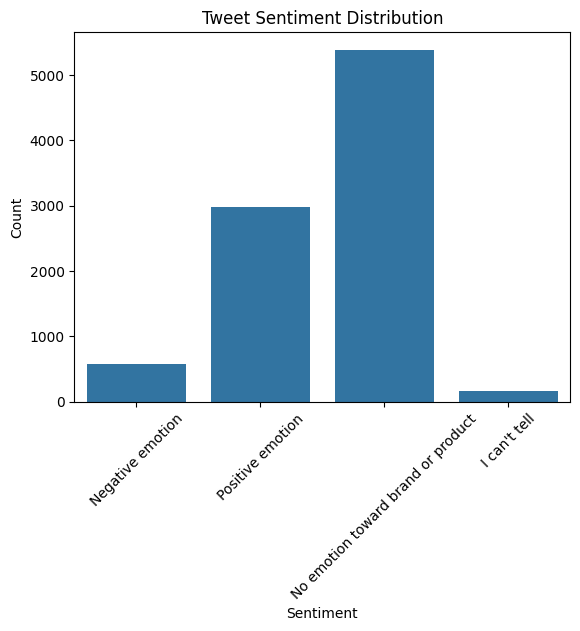

In [ ]:
# sentiment distribution plot
import seaborn as sns
sns.countplot(data=df, x='is_there_an_emotion_directed_at_a_brand_or_product')
plt.title('Tweet Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


- 'No emotion towards brand or product' had the highest count which shows that most sentiments/reaction given was generalized/neutral

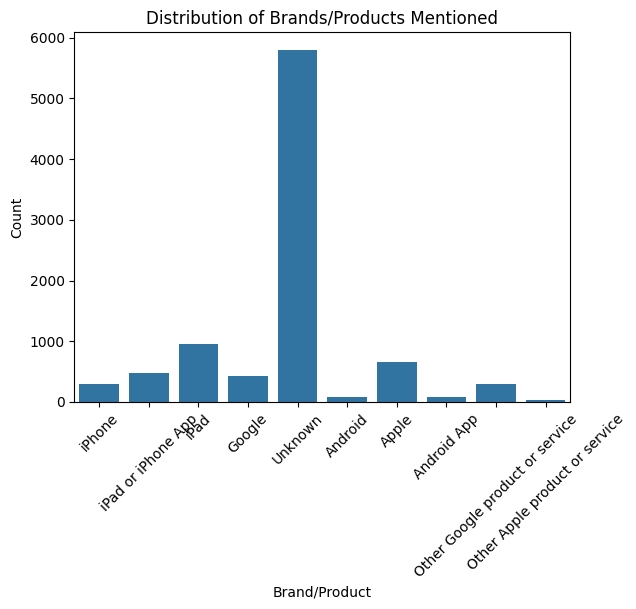

In [ ]:
# distribution of brands/products mentioned countplot
sns.countplot(data=df, x='emotion_in_tweet_is_directed_at')
plt.title('Distribution of Brands/Products Mentioned')
plt.xlabel('Brand/Product')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

- The above plot shows the frequency of each product/brand mentions.
Most of the data had missing values on the brand/product column hence filling the blanks with unknown- in this case unknown showing that the sentiments did not mention any product/brand name.

### Tokenization

In [ ]:
for index in range(df.tweet_text.shape[0]):
    df.tweet_text.iloc[index] = word_tokenize(df.tweet_text.iloc[index])

- The text was stripped down the tweet text into smaller units(tokens). Therefore allowing vectorization of the cleaned text which is a numerical representation of the tokens to capture the semantic meanings and relationship between words.

In [ ]:
tokens = []
for index in range(df.tweet_text.shape[0]):
    text=df.tweet_text.iloc[index]
    for word in text:tokens.append(word)
# creating frequency distribution from the tokens
freqdist = FreqDist(tokens)

# getting 200 most common words
most_common = freqdist.most_common(200)

print(most_common)


[('link', 4284), ('retweet', 2903), ('store', 1465), ('new', 1093), ('austin', 842), ('amp', 722), ('application', 655), ('launch', 643), ('social', 623), ('popup', 597), ('today', 576), ('circles', 529), ('sxsw', 487), ('network', 462), ('via', 435), ('line', 401), ('get', 393), ('free', 364), ('called', 361), ('party', 332), ('major', 302), ('mobile', 300), ('like', 290), ('time', 272), ('one', 272), ('temporary', 264), ('opening', 256), ('people', 255), ('possibly', 244), ('great', 223), ('downtown', 222), ('see', 220), ('going', 218), ('day', 216), ('check', 215), ('maps', 214), ('go', 212), ('open', 210), ('need', 203), ('mayer', 203), ('marissa', 192), ('got', 183), ('know', 182), ('googles', 182), ('come', 174), ('applications', 168), ('win', 168), ('first', 166), ('good', 165), ('us', 162), ('pop', 160), ('ipad2', 159), ('next', 148), ('want', 146), ('love', 145), ('cool', 143), ('panel', 142), ('shop', 142), ('best', 140), ('design', 138), ('app', 135), ('game', 135), ('make',

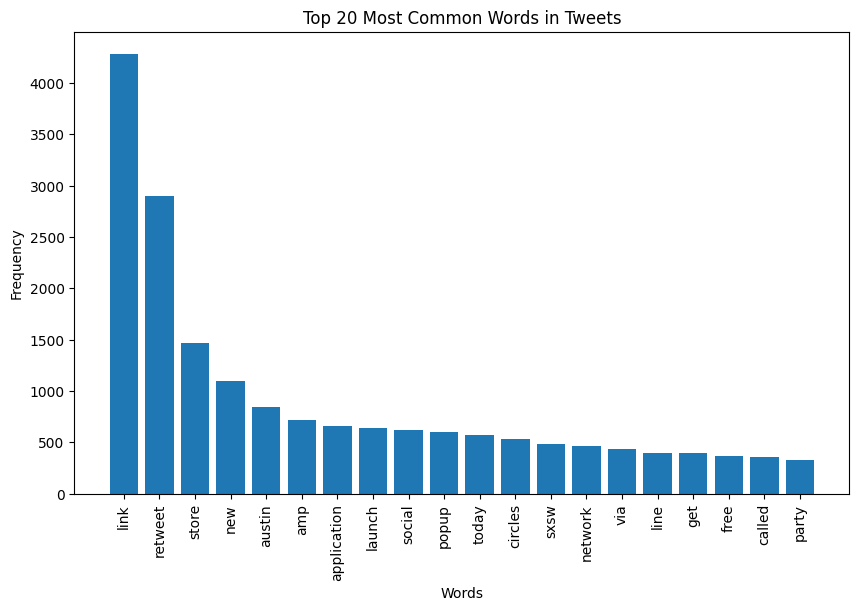

In [ ]:
#  top 20 most common words for visualization barplot
top_20 = freqdist.most_common(20)

# splitting the words and their frequencies into separate lists
words, frequencies = zip(*top_20)

plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xticks(rotation=90)
plt.title('Top 20 Most Common Words in Tweets')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

- The bar plot gives a quick idea of the common word in the tweets.


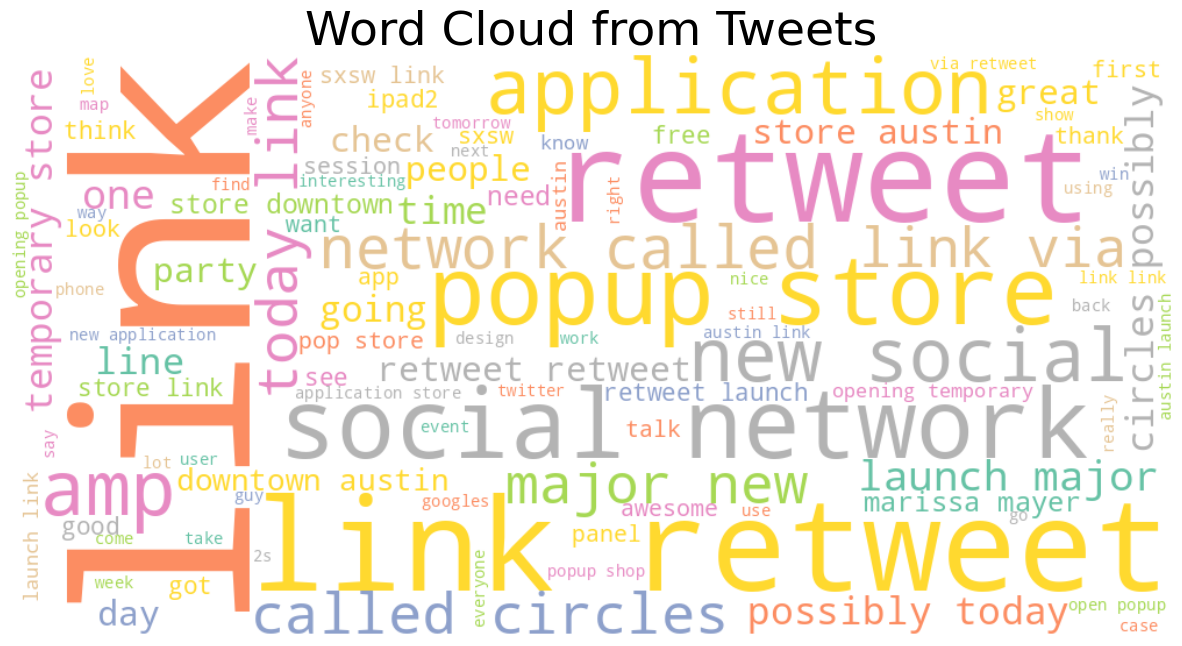

In [ ]:
#merging all English text into one string for the word cloud
tweet_data = ' '.join(' '.join(t) for t in df['tweet_text'])
# generating the word cloud with text data
wordcloud = WordCloud(width=1000, height=500,
                      background_color='white',
                      colormap='Set2',
                      max_words=100).generate(tweet_data)

# plotting
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud from Tweets', fontsize=34);

- The word cloud was used to create a visual summary of most used words.
the big fonts show the frequent used words in the tweets eg. link, link retweet, application.

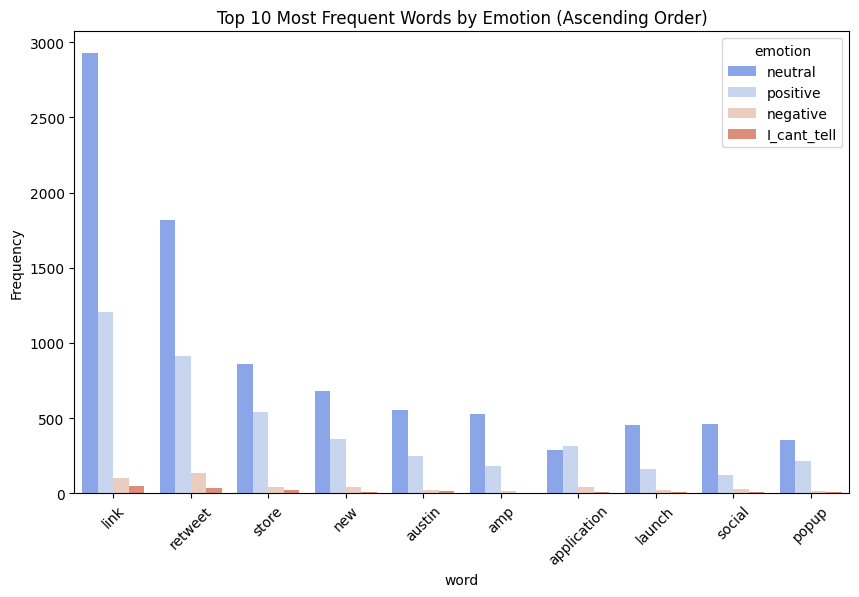

In [ ]:
word_emotion_counts = {}

# iterating through each tweet
for index in range(df.shape[0]):
    text = df.tweet_text.iloc[index]
    emotion = df.is_there_an_emotion_directed_at_a_brand_or_product.iloc[index]

    for word in text:
        if word not in word_emotion_counts:
            word_emotion_counts[word] = [0, 0, 0, 0]  # [neutral, positive, negative, I can't tell]

        if emotion == 'No emotion toward brand or product':
            word_emotion_counts[word][0] += 1
        elif emotion == 'Positive emotion':
            word_emotion_counts[word][1] += 1
        elif emotion == 'Negative emotion':
            word_emotion_counts[word][2] += 1
        else :
            word_emotion_counts[word][3] += 1

word_emotion_counts
emotion_data = []
for word, counts in word_emotion_counts.items():
    emotion_data.append({'word': word, 'neutral': counts[0], 'positive': counts[1], 'negative': counts[2], 'I_cant_tell': counts[3]})

emotion_df = pd.DataFrame(emotion_data)

# getting the top 10 words by frequency (neutral + positive + negative counts)
top_words = emotion_df.set_index('word').sum(axis=1).nlargest(10).index
top_words_df = emotion_df[emotion_df['word'].isin(top_words)]

# reshape the dataFrame for plotting
top_words_melted = top_words_df.melt(id_vars='word', value_vars=['neutral', 'positive', 'negative', 'I_cant_tell'],
                                     var_name='emotion', value_name='count')

# bar plot with hue for emotion
plt.figure(figsize=(10, 6))
sns.barplot(x='word', y='count', hue='emotion', data=top_words_melted, palette='coolwarm',
            order=top_words)
plt.title('Top 10 Most Frequent Words by Emotion (Ascending Order)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

- The word-sentiment mapping above was used to associate each word with how often it appears in 'positive', 'negative', 'no emotion' and 'I can't tell'

### Lemmatization

In [ ]:
lemmatizer = WordNetLemmatizer()

for index in range(df.tweet_text.shape[0]):
    text = df.tweet_text.iloc[index]
    tweet_text =[lemmatizer.lemmatize(word) for word in text]
    df.tweet_text.iloc[index] = tweet_text

- Lemmatization was used to normalize words to their base forms, reduce noise and improve interpretability.

In [ ]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,original_tweet
0,"[3g, hr, tweeting, dead, need, upgrade, plugin...",iPhone,Negative emotion,.@wesley83 I have a 3G iPhone. After 3 hrs twe...
1,"[know, awesome, application, likely, appreciat...",iPad or iPhone App,Positive emotion,@jessedee Know about @fludapp ? Awesome iPad/i...
2,"[wait, also, sale]",iPad,Positive emotion,@swonderlin Can not wait for #iPad 2 also. The...
3,"[hope, year, festival, crashy, year, app]",iPad or iPhone App,Negative emotion,@sxsw I hope this year's festival isn't as cra...
4,"[great, stuff, fri, marissa, mayer, tim, oreil...",Google,Positive emotion,@sxtxstate great stuff on Fri #SXSW: Marissa M...


## Vectorization/TF-IDF

In [ ]:
# Prepared the text
texts = [" ".join(text) for text in df.tweet_text]

# CountVectorizer
count_vect = CountVectorizer()
count_matrix = count_vect.fit_transform(texts)
count_df = pd.DataFrame(count_matrix.toarray(), columns=count_vect.get_feature_names_out())
print("CountVectorizer:\n")
print(count_df)

# TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf_matrix = tfidf_vect.fit_transform(texts)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vect.get_feature_names_out())

CountVectorizer:

      0310apple  100  103011p  1045am3  10am  10k  10mins  10pm  10x  10x2  \
0             0    0        0        0     0    0       0     0    0     0   
1             0    0        0        0     0    0       0     0    0     0   
2             0    0        0        0     0    0       0     0    0     0   
3             0    0        0        0     0    0       0     0    0     0   
4             0    0        0        0     0    0       0     0    0     0   
...         ...  ...      ...      ...   ...  ...     ...   ...  ...   ...   
9087          0    0        0        0     0    0       0     0    0     0   
9088          0    0        0        0     0    0       0     0    0     0   
9089          0    0        0        0     0    0       0     0    0     0   
9090          0    0        0        0     0    0       0     0    0     0   
9091          0    0        0        0     0    0       0     0    0     0   

      ...  zite  zlf  zms  zombie  zomg  zone

- Converted tweet text into numerical features using countVectorizer and TF-IDF.
This emphasizes emotionally charged/ brand-specific terms that are rare but meaningful

In [ ]:
top_n = 5

print("\nTF-IDF Vectorizer (Top Words per Document):\n")
for i, row in tfidf_df.iterrows():
    doc_tfidf = row[row > 0].sort_values(ascending=False).head(top_n).round(3)
    print(f"\nDocument {i + 1}:")
    print(doc_tfidf.reset_index().rename(columns={'index': 'Word', i: 'TF-IDF'}))

Streaming output truncated to the last 5000 lines.

Document 8449:
         Word  TF-IDF
0  resurgence   0.458
1         fam   0.385
2    enjoying   0.374
3     showing   0.337
4      center   0.331

Document 8450:
        Word  TF-IDF
0  reassured   0.348
1    terrace   0.348
2    rooftop   0.323
3       soft   0.323
4    hacking   0.308

Document 8451:
        Word  TF-IDF
0        n26   0.449
1     terror   0.449
2      level   0.377
3  40075959p   0.347
4        red   0.327

Document 8452:
         Word  TF-IDF
0     torrent   0.446
1      expect   0.437
2  unofficial   0.437
3        hear   0.377
4         way   0.320

Document 8453:
       Word  TF-IDF
0     tough   0.482
1    urinal   0.472
2   holding   0.406
3        ur   0.396
4  tweeting   0.389

Document 8454:
          Word  TF-IDF
0         week   0.451
1  comfortable   0.370
2         wise   0.358
3       typing   0.330
4        sixth   0.304

Document 8455:
      Word  TF-IDF
0    index   0.343
1      dow   0.329
2     

- Printed the top 5 most informative words in each tweet based on TF-IDF scores which plays a role in showing words that have a meaning in each tweet

In [ ]:
X_tfidf_dense = tfidf_matrix.toarray()
def print_top_features(document_index, top_n=10):
    scores = X_tfidf_dense[document_index]
    vocabulary = tfidf_vect.get_feature_names_out()
    print("Vocabulary:", vocabulary)
    feature_scores = [(vocabulary[i], scores[i]) for i in range(len(vocabulary))]

    feature_scores.sort(key=lambda x: x[1], reverse=True)


    print(f"Top {top_n} features for document {document_index}:")
    for term, score in feature_scores[:top_n]:
        print(f"{term}: {score:.4f}")
    print()


for i in range(min(5, tfidf_matrix.shape[0])):
    print_top_features(i)

vocabulary = tfidf_vect.get_feature_names_out()
print("Vocabulary:", vocabulary)

df_vectorization = pd.DataFrame(X_tfidf_dense, columns=vocabulary)
print(df.head())

Vocabulary: ['0310apple' '100' '103011p' ... 'zuckerberg' 'zynga' 'zzzs']
Top 10 features for document 0:
hr: 0.4134
plugin: 0.4134
station: 0.3669
upgrade: 0.3633
dead: 0.3511
tweeting: 0.3333
3g: 0.3247
need: 0.2275
0310apple: 0.0000
100: 0.0000

Vocabulary: ['0310apple' '100' '103011p' ... 'zuckerberg' 'zynga' 'zzzs']
Top 10 features for document 1:
appreciate: 0.4787
likely: 0.4300
giving: 0.3358
also: 0.3319
design: 0.3041
awesome: 0.3032
know: 0.2806
free: 0.2462
application: 0.1983
0310apple: 0.0000

Vocabulary: ['0310apple' '100' '103011p' ... 'zuckerberg' 'zynga' 'zzzs']
Top 10 features for document 2:
sale: 0.6098
wait: 0.5611
also: 0.5598
0310apple: 0.0000
100: 0.0000
103011p: 0.0000
1045am3: 0.0000
10am: 0.0000
10k: 0.0000
10mins: 0.0000

Vocabulary: ['0310apple' '100' '103011p' ... 'zuckerberg' 'zynga' 'zzzs']
Top 10 features for document 3:
year: 0.5942
crashy: 0.5268
festival: 0.3867
hope: 0.3558
app: 0.3053
0310apple: 0.0000
100: 0.0000
103011p: 0.0000
1045am3: 0.0000
1

In [ ]:
print (df.head())

                                          tweet_text  \
0  [3g, hr, tweeting, dead, need, upgrade, plugin...   
1  [know, awesome, application, likely, appreciat...   
2                                 [wait, also, sale]   
3          [hope, year, festival, crashy, year, app]   
4  [great, stuff, fri, marissa, mayer, tim, oreil...   

  emotion_in_tweet_is_directed_at  \
0                          iPhone   
1              iPad or iPhone App   
2                            iPad   
3              iPad or iPhone App   
4                          Google   

  is_there_an_emotion_directed_at_a_brand_or_product  \
0                                   Negative emotion   
1                                   Positive emotion   
2                                   Positive emotion   
3                                   Negative emotion   
4                                   Positive emotion   

                                      original_tweet  
0  .@wesley83 I have a 3G iPhone. After 3 hrs tw

In [ ]:
#initializing sentiment analyze
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sent = SentimentIntensityAnalyzer()
def get_sentiment_scores(text):
    if isinstance(text, list):
        text = ' '.join(text)

    return sent.polarity_scores(text)
def get_sentiment_label(scores):
    compound = scores['compound']
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


## VADER compound score + label extraction

In [ ]:
# Applied sentiment analysis with the fixed function
df['sentiment_scores'] = df['tweet_text'].apply(get_sentiment_scores)

# Extracted the compound score
df['compound_score'] = df['sentiment_scores'].apply(lambda x: x['compound'])

#Applied sentiment labeling
df['sentiment_label'] = df['sentiment_scores'].apply(get_sentiment_label)

# Display the results
print(df[['tweet_text', 'compound_score', 'sentiment_label']].head())

                                          tweet_text  compound_score  \
0  [3g, hr, tweeting, dead, need, upgrade, plugin...         -0.6486   
1  [know, awesome, application, likely, appreciat...          0.9100   
2                                 [wait, also, sale]          0.0000   
3          [hope, year, festival, crashy, year, app]          0.7269   
4  [great, stuff, fri, marissa, mayer, tim, oreil...          0.6249   

  sentiment_label  
0        negative  
1        positive  
2         neutral  
3        positive  
4        positive  


- Aplied vader compound score + labeling
- compound_score is a single number that summarized the tweet's emotional tone
- sentiment_label translated the score to positive, negative or neutral.
used the above to compare with ML models

# Modeling

# Logistic regression model

In [ ]:
#Splitting the df into training and testing data to an algorithm
y = df.is_there_an_emotion_directed_at_a_brand_or_product
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.3, random_state=42)
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

                                    precision    recall  f1-score   support

                      I can't tell       0.00      0.00      0.00        41
                  Negative emotion       0.73      0.04      0.08       182
No emotion toward brand or product       0.67      0.88      0.76      1585
                  Positive emotion       0.64      0.44      0.52       920

                          accuracy                           0.66      2728
                         macro avg       0.51      0.34      0.34      2728
                      weighted avg       0.65      0.66      0.62      2728



- The model had a accuracy of 66% meaning it predicted the sentiments for 2 out of every 3 tweets.This metric is misleading because the recall for "I_cant_tell" and "Negative_emotion" are zero and 4% respectively this means that the model could barely tell actual and negative sentiments. With low macro-average f1 score indicating the model is not reliable across all sentiment categories.
- There is a clear class imbalance shown by the two classes "i cant tell and negative emotion" which had 41 and 182 instances in the whole document.

In [ ]:
#Splitting the data into training and testing data to an algorithm
y = df['sentiment_label']
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.3, random_state=42)
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.97      0.32      0.48       325
     neutral       0.78      0.90      0.84      1179
    positive       0.85      0.88      0.86      1224

    accuracy                           0.82      2728
   macro avg       0.87      0.70      0.73      2728
weighted avg       0.83      0.82      0.81      2728



- Used a different approach of sentiment_label which improved the accuracy to 82% and macro average 73% which was better than the prior but still was biased

Random Forest

In [ ]:
param_grid = {
    "criterion":["gini","entropy"],
    "max_depth":[None,5,10,15],
    "min_samples_split":[2,10],
    "min_samples_leaf":[1,4,8]
}

In [ ]:
forest = RandomForestClassifier(
    n_estimators=200,
    criterion='gini',
    max_depth=20,
    random_state=42,
    n_jobs=-3
)
grid_search = GridSearchCV(
    estimator=forest,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train,y_train)


y_pred = grid_search.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.94      0.42      0.58       325
     neutral       0.77      0.97      0.86      1179
    positive       0.94      0.83      0.88      1224

    accuracy                           0.84      2728
   macro avg       0.88      0.74      0.77      2728
weighted avg       0.86      0.84      0.83      2728

Accuracy: 0.843108504398827


- Random Forest Improved over Logistic Regression with Accuracy of 84% and macro avg of 77%, by capturing more complex patterns in TF-IDF features.added value as interpretable model for sentiment classification. However, its lack of sequential awareness limited its ability to capture deeper meaning in tweets.





Multiclass Neural Network

In [ ]:
# Prepared inputs and labels
X = df['tweet_text'].astype(str).values
y = df['sentiment_label'].values

# Encoded sentiment labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Tokenized and pad text
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=100, padding='post', truncating='post')

# Trained/tested split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_encoded, test_size=0.2, random_state=42)

In [ ]:
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)  # One-hot encode the labels

# Splited the data
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix.toarray(), y_categorical, test_size=0.3, random_state=42)

# Defined model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_categorical.shape[1], activation='softmax'))  # Output layer for multiclass

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Predict
y_pred_prob = model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Evaluation
print("\nClassification Report for Multiclass Neural Network:\n")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

Epoch 1/5
199/199 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5235 - loss: 0.9815 - val_accuracy: 0.7386 - val_loss: 0.6241
Epoch 2/5
199/199 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8386 - loss: 0.4234 - val_accuracy: 0.8383 - val_loss: 0.4358
Epoch 3/5
199/199 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9631 - loss: 0.1421 - val_accuracy: 0.8512 - val_loss: 0.4101
Epoch 4/5
199/199 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9887 - loss: 0.0556 - val_accuracy: 0.8570 - val_loss: 0.4331
Epoch 5/5
199/199 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9960 - loss: 0.0283 - val_accuracy: 0.8596 - val_loss: 0.4576
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Classification Report for Multiclass Neural Network:

              precision    recall  f1-score   support

    negative       0.81      0.62      0.71       325
     neutral       0.85      0.88      0.87      1179
    positive       0.88      0.90      0.89      1224

    accuracy                           0.86      27

In [ ]:
print(y)

['negative' 'positive' 'neutral' ... 'neutral' 'negative' 'neutral']


- The Accuracy of 86%, macro average f1 score 0f 82% the neural network model performed well offering improved acccuracy over prior models but wasn't able to fully capture 'tone, sarcasm or negation' and it was unable to process word order.

LSTM- Long-short term memory

In [ ]:
# Tokenization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['tweet_text'])
X_seq = tokenizer.texts_to_sequences(df['tweet_text'])
X_pad = pad_sequences(X_seq, maxlen=100)

# Encode labels
le = LabelEncoder()
y = le.fit_transform(df['sentiment_label'])
y_cat = to_categorical(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_cat, test_size=0.2, stratify=y, random_state=42)

# Build LSTM Model
model_lstm = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),
    LSTM(128),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_cat.shape[1], activation='softmax')
])

model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_lstm.summary()

# Train
history = model_lstm.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluate
y_pred = model_lstm.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

print(classification_report(y_true, y_pred_classes, target_names=le.classes_))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
228/228 ━━━━━━━━━━━━━━━━━━━━ 43s 173ms/step - accuracy: 0.5651 - loss: 0.8961 - val_accuracy: 0.8224 - val_loss: 0.4739
Epoch 2/5
228/228 ━━━━━━━━━━━━━━━━━━━━ 40s 176ms/step - accuracy: 0.8953 - loss: 0.3065 - val_accuracy: 0.8851 - val_loss: 0.3545
Epoch 3/5
228/228 ━━━━━━━━━━━━━━━━━━━━ 43s 185ms/step - accuracy: 0.9683 - loss: 0.1127 - val_accuracy: 0.8895 - val_loss: 0.3820
Epoch 4/5
228/228 ━━━━━━━━━━━━━━━━━━━━ 79s 171ms/step - accuracy: 0.9830 - loss: 0.0641 - val_accuracy: 0.8955 - val_loss: 0.4286
Epoch 5/5
228/228 ━━━━━━━━━━━━━━━━━━━━ 40s 168ms/step - accuracy: 0.9863 - loss: 0.0557 - val_accuracy: 0.8939 - val_loss: 0.4967
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step
              precision    recall  f1-score   support

    negative       0.79      0.66      0.72       206
     neutral       0.89      0.93      0.91       797
    positive       0.92      0.92      0.92       816

    accuracy                           0.89      1819
   macro avg       0.87      0.84     

In [ ]:
y = df['sentiment_label']
# Encoded labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Tokenization and padding already done earlier as X_pad
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_categorical, test_size=0.3, random_state=42)

# LSTM Model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=64, input_length=100))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_categorical.shape[1], activation='softmax'))  # For multiclass

# Compile and Train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Predict and Evaluate
y_pred_prob = model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=1)
y_true = y_test.argmax(axis=1)

from sklearn.metrics import classification_report
print("\nClassification Report for LSTM Model:\n")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
199/199 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - accuracy: 0.5350 - loss: 0.9529 - val_accuracy: 0.7573 - val_loss: 0.6148
Epoch 2/5
199/199 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.8475 - loss: 0.4227 - val_accuracy: 0.8512 - val_loss: 0.4116
Epoch 3/5
199/199 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - accuracy: 0.9489 - loss: 0.1502 - val_accuracy: 0.8790 - val_loss: 0.3918
Epoch 4/5
199/199 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.9871 - loss: 0.0536 - val_accuracy: 0.8842 - val_loss: 0.4092
Epoch 5/5
199/199 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.9885 - loss: 0.0444 - val_accuracy: 0.8871 - val_loss: 0.4973
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step

Classification Report for LSTM Model:

              precision    recall  f1-score   support

    negative       0.88      0.60      0.72       325
     neutral       0.88      0.92      0.90      1179
    positive       0.90      0.93      0.91      1224

    accuracy                           0.89      2728
   

- The LSTM was the most effective model for sentiment analysis. It captured both meaning and structure, providing reliable sentiment classification for complex, short-form text like tweets. It was balanced across all emotions and handled confusing/ emotional tweets better than the other models with Accuracy score of 89%, macro average f1 score of 84%

# Conclusion

- After building and evaluating multiple machine learning and deep learning models, LSTM demonstrated the highest effectiveness in understanding language in a better way, making it the most suitable model for sentiment analysis on social media text. Future enhancements could include more training data, use of pre-trained embeddings like GloVe or BERT, or expanding into bidirectional LSTMs for even deeper context learning.

# Recommendations
## Data Imbalance:
The model struggles to detect negative sentiment reliably due to a significant under-representation (only 326 instances). To improve recall for the negative class, consider oversampling the negatives, undersampling the majority classes, or generating synthetic samples using methods like SMOTE. Handling of Missing Emotional Target Data: With about 64% of entries missing in the emotional target field, simply replacing missing values with "None" is insufficient.
A more nuanced, multi-stage process is suggested—first identifying if a tweet targets any brand, then pinpointing the specific brand, and finally assessing the sentiment. This refined approach could yield deeper insights into brand-specific sentiment. Combat Neural Network Overfitting:
The current neural network shows near-perfect performance on training data but plateaus on validation data, signaling overfitting. Integrate further regularization techniques (e.g., additional dropout layers, L1/L2 regularization) and early stopping to improve generalization on unseen data.

## Explore Ensemble Methods:
Merging the high precision of the logistic regression model (which, however, has low recall for negatives) with other algorithms that better capture negative sentiment could help balance the precision-recall trade-off. An ensemble approach may provide more robust and reliable sentiment classifications across all sentiment categories.

To enhance sentiment analysis performance, it is crucial to balance the dataset through sampling or synthetic data generation, adopt a multi-stage classification process for more refined brand and sentiment detection, and address overfitting in the neural network with stronger regularization measures and early stopping. Moreover, integrating ensemble methods that combine models with complementary strengths could further balance precision and recall, leading to a more reliable analysis